Many thanks to Theano Xirouchaki for their workshop template! - https://github.com/theo-xir

# Workshop 5

In this workshop we are going to focus on representing our data and analyses with graphs. We can quickly find patterns in the visual information we encounter. Unfortunately, when data is represented as tables of values, we can't really take advantage of our visual pattern matching capabilities.

We'll focus on data visualization techniques that explore datasets and help us uncover patterns. In this mission, we'll use a specific type of data visualization to understand U.S. unemployment data.

We are first going to need to load our dataset using the pandas library.

In [3]:
import pandas as pd
unrate = pd.read_csv("unrate.csv")
unrate.head(5)

,DATE,VALUE
0,1948-01-01,3.4
1,1948-02-01,3.8
2,1948-03-01,4.0
3,1948-04-01,3.9
4,1948-05-01,3.5


In order to make python understand that the 'DATE' column contains dates we will use the simple function from Pandas 'to_datetime' which does exactly what it says.

In [4]:
unrate['DATE'] = pd.to_datetime(unrate['DATE'])
unrate.head(5)

,DATE,VALUE
0,1948-01-01,3.4
1,1948-02-01,3.8
2,1948-03-01,4.0
3,1948-04-01,3.9
4,1948-05-01,3.5


Instead of representing data using text like tables do, visual representations use visual objects like dots, shapes, and lines on a grid. Plots are a category of visual representations that allow us to easily understand the relationships between variables. There are many types of plots and selecting the right one is an important skill that you'll hone as you create data visualizations. Because we want to compare the unemployment trends across time, we should use line charts.

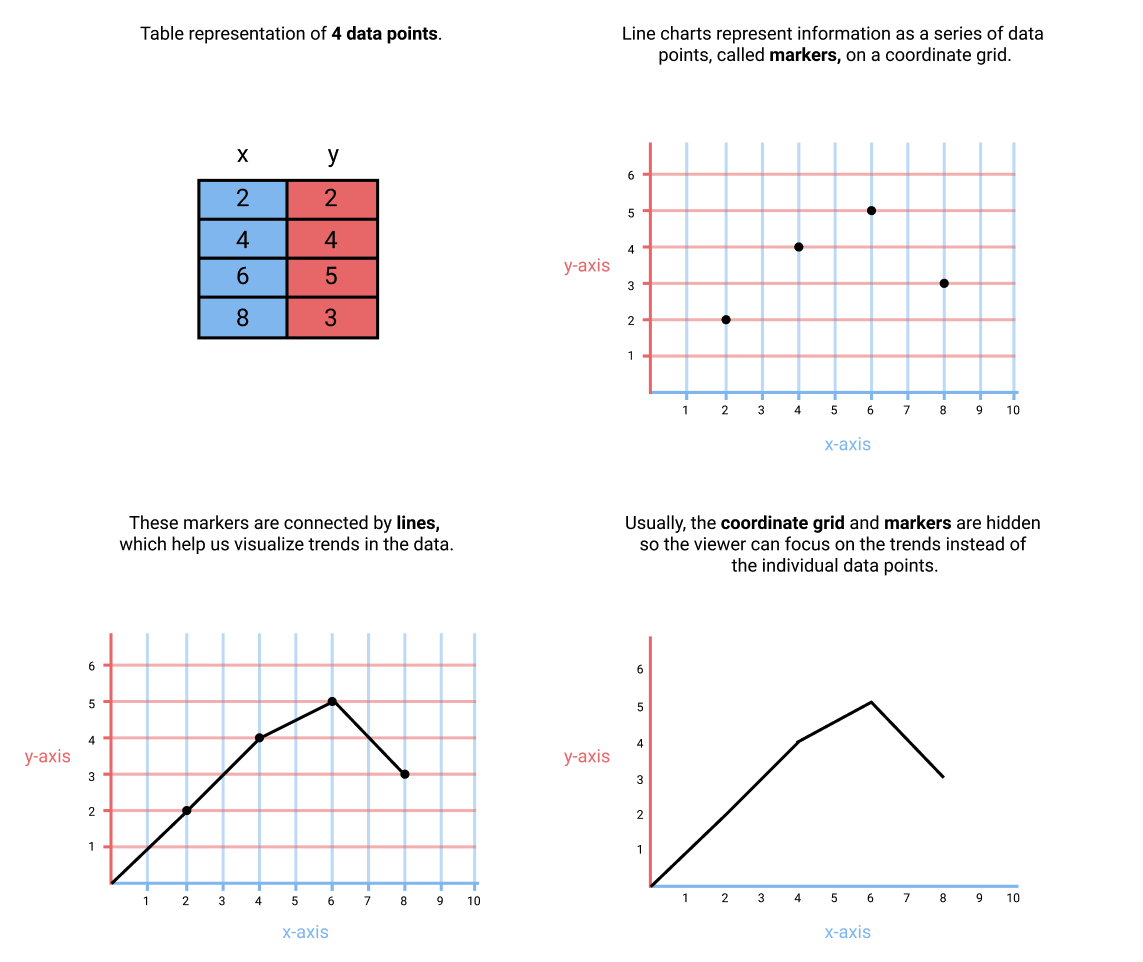

To create the line chart, we'll use the matplotlib library, which allows us to:

* quickly create common plots using high-level functions
* extensively tweak plots
* create new kinds of plots from the ground up

To help you become familiar with matplotlib, we'll focus on the first 2 use cases. When working with commonly used plots in matplotlib, the general workflow is:

* create a plot using data
* customize the appearance of the plot
* display the plot
* edit and repeat until satisfied

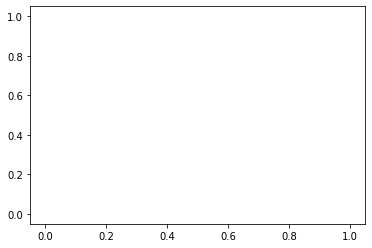

In [7]:
import matplotlib.pyplot as plt
plt.plot()
plt.show()

The pyplot module provides a high-level interface for matplotlib that allows us to quickly create common data plots and perform common tweaks to them.

Let's try creating a line plot of the change of unemployment rate through the first year.

         DATE  VALUE
0  1948-01-01    3.4
1  1948-02-01    3.8
2  1948-03-01    4.0
3  1948-04-01    3.9
4  1948-05-01    3.5
5  1948-06-01    3.6
6  1948-07-01    3.6
7  1948-08-01    3.9
8  1948-09-01    3.8
9  1948-10-01    3.7
10 1948-11-01    3.8
11 1948-12-01    4.0


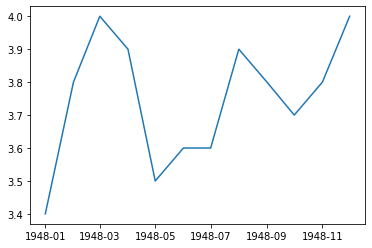

In [8]:
first_twelve = unrate[0:12]
print(first_twelve)
plt.plot(first_twelve['DATE'], first_twelve['VALUE'])
plt.show()

Now let's start tweaking our graph in order to improve it. We can start by inverting the x-axis labels using the 'xticks' method. For inverting y-axis values we use 'yticks'.

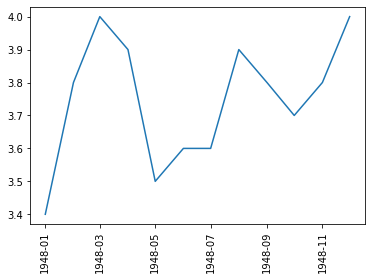

In [9]:
plt.plot(first_twelve["DATE"], first_twelve["VALUE"])
plt.xticks(rotation=90)
plt.show()

Let's now finish tweaking this plot by adding axis labels and a title. Always adding axis labels and a title to your plot is a good habit to have, and is especially useful when we're trying to keep track of multiple plots down the road.

Here's an overview of the pyplot functions we need to tweak the axis labels and the plot title:

* xlabel(): accepts a string value, which gets set as the x-axis label.
* ylabel(): accepts a string value, which is set as the y-axis label.
* title(): accepts a string value, which is set as the plot title.

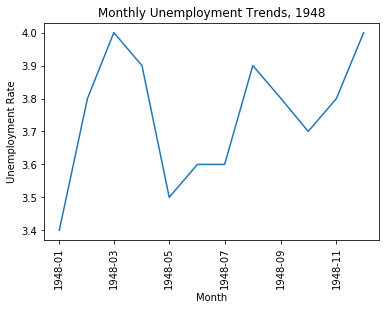

In [12]:
plt.plot(first_twelve["DATE"], first_twelve["VALUE"])
plt.xticks(rotation=90)
plt.xlabel("Month")
plt.ylabel("Unemployment Rate")
plt.title("Monthly Unemployment Trends, 1948")
plt.show()

In order to create multiple plots at once, we will create a 'figure' from pyplot. A figure acts as a container for all of our plots and has methods for customizing the appearance and behavior for the plots within that container. Some examples include changing the overall width and height of the plotting area and the spacing between plots.

In [ ]:
# fig = plt.figure()

While plots are represented using instances of the Axes class, they're also often referred to as subplots in matplotlib. To add a new subplot to an existing figure, use Figure.add_subplot. This will return a new Axes object, which needs to be assigned to a variable.

In [ ]:
# axes_obj = fig.add_subplot(nrows, ncols, plot_number)

If we want the figure to contain 2 plots, one above the other, we need to write:

In [ ]:
# ax1 = fig.add_subplot(2,1,1)
# ax2 = fig.add_subplot(2,1,2)

Let's see it in action.

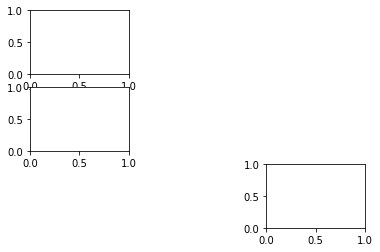

In [14]:
fig = plt.figure()
ax1 = fig.add_subplot(3,3,1)
ax2 = fig.add_subplot(3,3,4)
ax3 = fig.add_subplot(3,3,9)
plt.show()

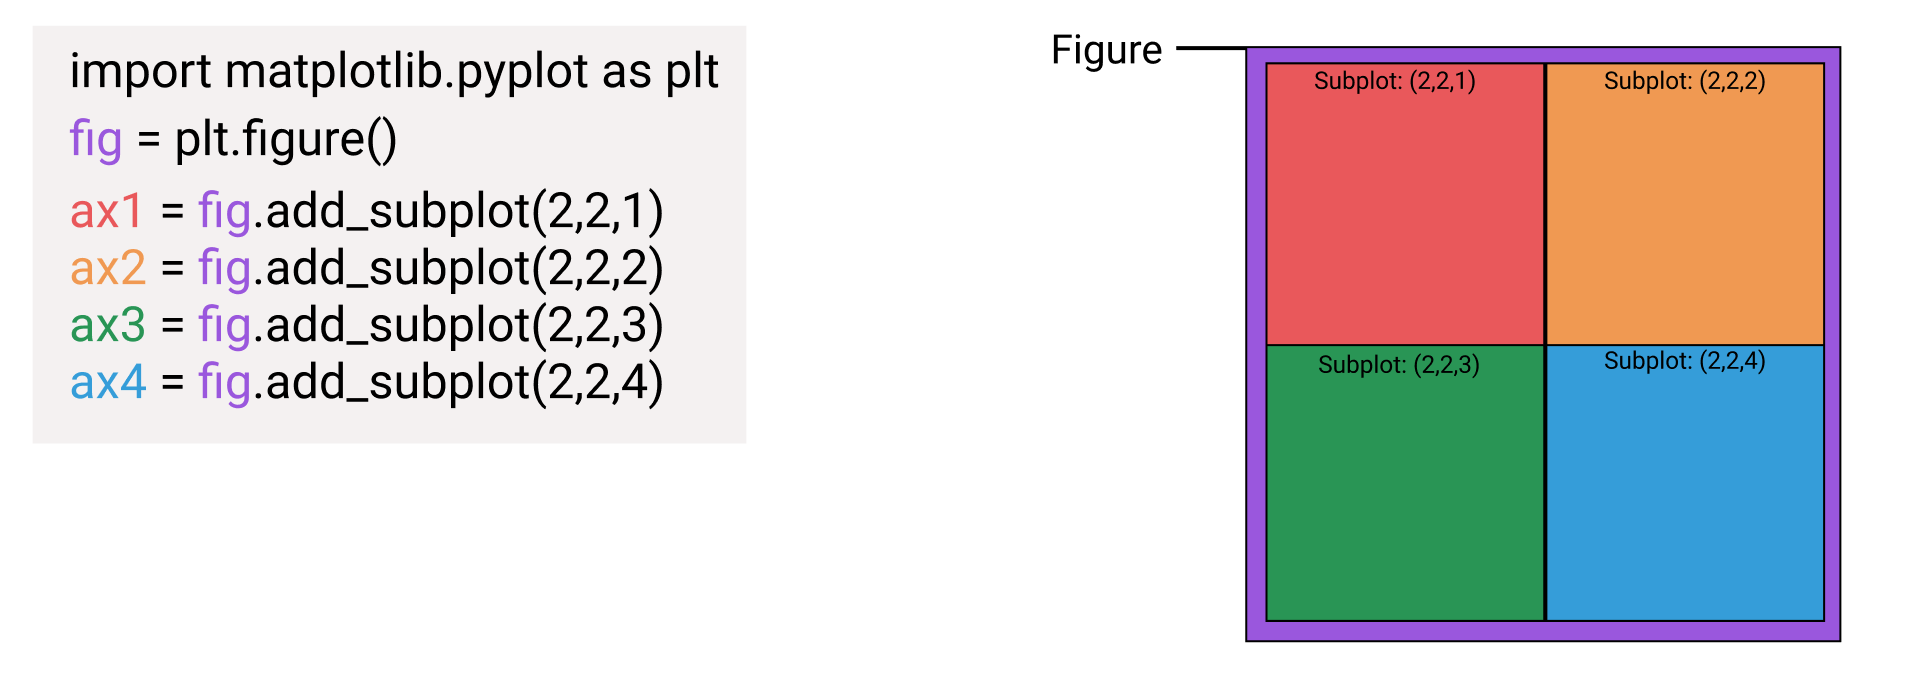

Let's create 2 line plots containing the first and second year respectively.

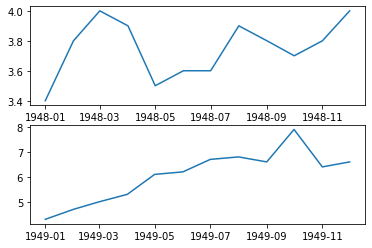

In [15]:
fig = plt.figure()
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)

ax1.plot(unrate[0:12]['DATE'], unrate[0:12]['VALUE'])
ax2.plot(unrate[12:24]['DATE'], unrate[12:24]['VALUE'])
plt.show()


We can also plot plots in the same box, by simply not using the 'add_subplot' method.

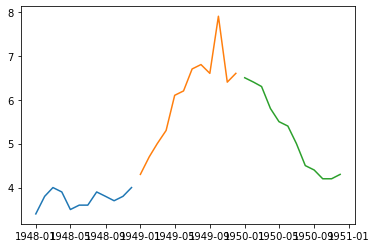

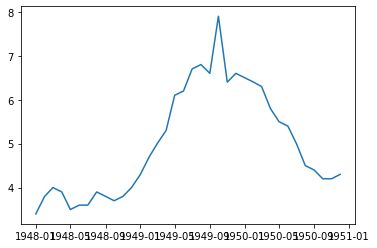

In [16]:
plt.plot(unrate[0:12]['DATE'], unrate[0:12]['VALUE'])
plt.plot(unrate[12:24]['DATE'], unrate[12:24]['VALUE'])
plt.plot(unrate[24:36]['DATE'], unrate[24:36]['VALUE'])
plt.show()

plt.plot(unrate[0:36]['DATE'], unrate[0:36]['VALUE'])
plt.show()

We can also use our own choice of colors for each plot using the 'c' parameter.

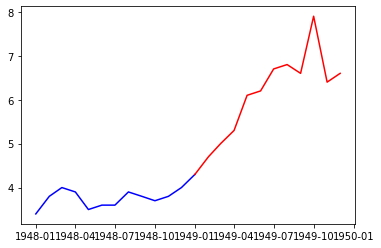

In [18]:
plt.plot(unrate[0:13]['DATE'], unrate[0:13]['VALUE'],c = 'blue')
plt.plot(unrate[12:24]['DATE'], unrate[12:24]['VALUE'],c = 'red')

plt.show()

Let's also increase the size of the figure and make the x-axis labels vertical so the plot is more clear.

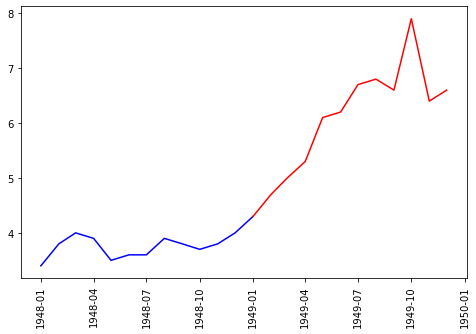

In [21]:
fig = plt.figure(figsize = (8,5))

plt.plot(unrate[0:13]['DATE'], unrate[0:13]['VALUE'],c = 'blue')
plt.plot(unrate[12:24]['DATE'], unrate[12:24]['VALUE'],c = 'red')
plt.xticks(rotation = 90)
plt.show()

A useful tip when you need to create multiple plots is using a for loop. 

For example if we wanted to visualize 5 years worth of unemployment rates on the same subplot. We could do the following:

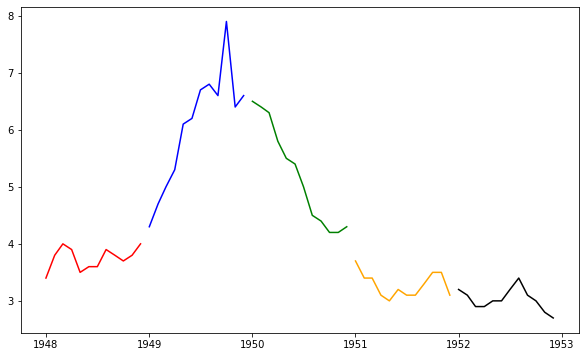

In [22]:
fig = plt.figure(figsize = (10,6))
colors = ['red', 'blue', 'green', 'orange', 'black']
for i in range(5):
    start_index = i*12
    end_index = (i+1)*12
    subset = unrate[start_index:end_index]
    plt.plot(subset['DATE'], subset['VALUE'], c=colors[i])
plt.show()

To help remind us which year each line corresponds to, we can add a legend that links each color to the year the line is representing. We can do that using the plt.legend() function and for the location of the legend we can use the 'loc' parameter.

No handles with labels found to put in legend.


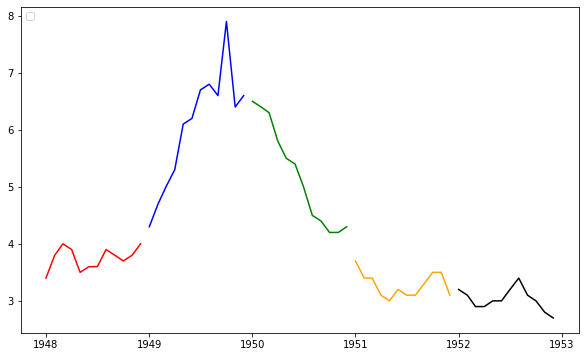

In [23]:
fig = plt.figure(figsize=(10,6))
colors = ['red', 'blue', 'green', 'orange', 'black']
for i in range(5):
    start_index = i*12
    end_index = (i+1)*12
    subset = unrate[start_index:end_index]
    plt.plot(subset['DATE'], subset['VALUE'], c=colors[i],...)
plt.legend(loc = 'upper left')
plt.show()

## Exercise 1 

Well that did not work that is because we need to have assigned a label to each plot in order for the legend to understand which color goes to what plot. That is done using the 'label' parameter in the plot function. Try making the label of each plot the year it represents. Use the code below and add labels to fix it.

E.g for example the first plot should be written as:

plt.plot(..., label = '1948')

In [ ]:
fig = plt.figure(figsize=(10,6))
colors = ['red', 'blue', 'green', 'orange', 'black']
years = [???]
for i in range(5):
    start_index = i*12
    end_index = (i+1)*12
    subset = unrate[start_index:end_index]
    plt.plot(subset['DATE'], subset['VALUE'], c=colors[i], label = ???)
plt.legend(loc = 'upper left')
plt.show()

We saw how line plots work, we will now see 2 new kind of plots that work better for data that do not have a particular order.

We'll be working with the fandango_scores.csv file to investigate the potential bias that movie reviews site have, FiveThirtyEight compiled data for 147 films from 2015 that have substantive reviews from both critics and consumers. Every time Hollywood releases a movie, critics from Metacritic, Fandango, Rotten Tomatoes, and IMDB review and rate the film.

Here are the columns we'll be working with:

* FILM - film name
* RT_user_norm - average user rating from Rotten Tomatoes, normalized to a 1 to 5 point scale
* Metacritic_user_nom - average user rating from Metacritic, normalized to a 1 to 5 point scale
* IMDB_norm - average user rating from IMDB, normalized to a 1 to 5 point scale
* Fandango_Ratingvalue - average user rating from Fandango, normalized to a 1 to 5 point scale
* Fandango_Stars - the rating displayed on the Fandango website (rounded to nearest star, 1 to 5 point scale)

In [24]:
reviews = pd.read_csv('fandango_scores.csv')
reviews.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5


We will only be using the columns mentioned above.

In [25]:
cols = ['FILM', 'RT_user_norm', 'Metacritic_user_nom', 'IMDB_norm', 'Fandango_Ratingvalue', 'Fandango_Stars']
norm_reviews = reviews[cols]
norm_reviews.head()

,FILM,RT_user_norm,Metacritic_user_nom,IMDB_norm,Fandango_Ratingvalue,Fandango_Stars
0,Avengers: Age of Ultron (2015),4.3,3.55,3.90,4.5,5.0
1,Cinderella (2015),4.0,3.75,3.55,4.5,5.0
2,Ant-Man (2015),4.5,4.05,3.90,4.5,5.0
3,Do You Believe? (2015),4.2,2.35,2.70,4.5,5.0
4,Hot Tub Time Machine 2 (2015),1.4,1.70,2.55,3.0,3.5


Our goal is to determine whether the Fandango site is biased in its system and it it gives suspiciously high reviews.

We will now see how to create a bar plot. We will analyse the reviews from each site for the movie 'Avengers: Age of Ultron'

In [34]:
avengers = norm_reviews.loc[0, :]
avengers


FILM                    Avengers: Age of Ultron (2015)
RT_user_norm                                       4.3
Metacritic_user_nom                               3.55
IMDB_norm                                          3.9
Fandango_Ratingvalue                               4.5
Fandango_Stars                                       5
Name: 0, dtype: object

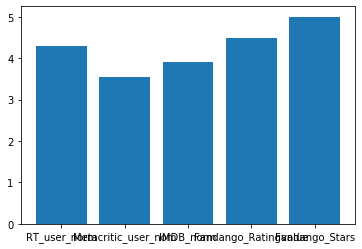

In [27]:
plt.bar(avengers.index[1:],avengers[1:] )
plt.show()

Now in order to improve our plot we will use the same techniques we saw above.

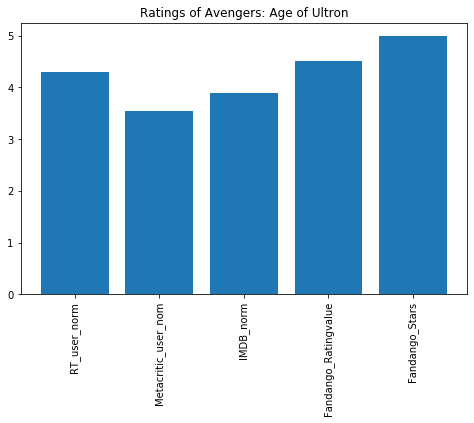

In [30]:
fig = plt.figure(figsize = (8, 5))

plt.bar(avengers.index[1:], avengers[1:])
plt.title('Ratings of Avengers: Age of Ultron')
plt.xticks(rotation = 90)
plt.show()

If we want our bars to be horizontal instead of vertical we just use 'barh' instead of 'bar'.

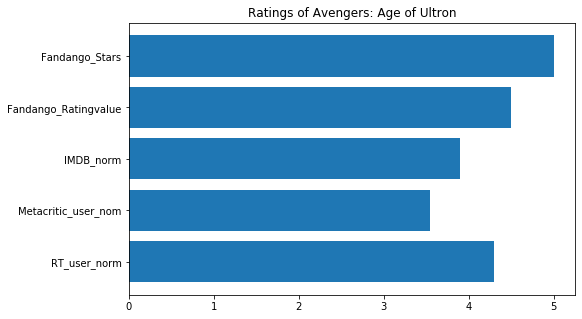

In [32]:
fig = plt.figure(figsize = (8, 5))

plt.barh(avengers.index[1:], avengers[1:])
plt.title('Ratings of Avengers: Age of Ultron')
plt.show()

## Exercise 2 

Create 2 horizontal bar plots one on top of each other of the 2nd and 3rd movies in our dataset, 'Cinderella' and 'Ant-Man', using the 'figure' and 'add_subplot' methods we saw above. You might need the method 'title.set_text()', try googling the syntax!



Extra: Try to make the first be blue and the second red, you will need google to find out how to do that as it is not exactly the same as in 'plot'.

In [ ]:
cinderella = norm_reviews.loc[???, :]
ant_man = ???

fig2 = plt.figure(figsize = (8, 8))

bar1 = fig2.add_subplot(2,1,1)
bar2 = ???

bar1.barh(cinderella.???, ????, color = 'blue')
bar2.barh(???, ???, ???)

bar1.title.set_text('Ratings of Cinderella')
bar2.???

From the horizontal bar plot, we can more easily determine that the 2 average scores from Fandango users are higher than those from the other sites. While bar plots help us visualize a few data points to quickly compare them, they aren't good at helping us visualize many data points. Let's look at a plot that can help us visualize many points.

In the previous mission, the line charts we generated always connected points from left to right. This helped us show the trend, up or down, between each point as we scanned visually from left to right. Instead, we can avoid using lines to connect markers and just use the underlying markers. A plot containing just the markers is known as a scatter plot.

Scatter plots are great for displaying correlation between 2 variables.

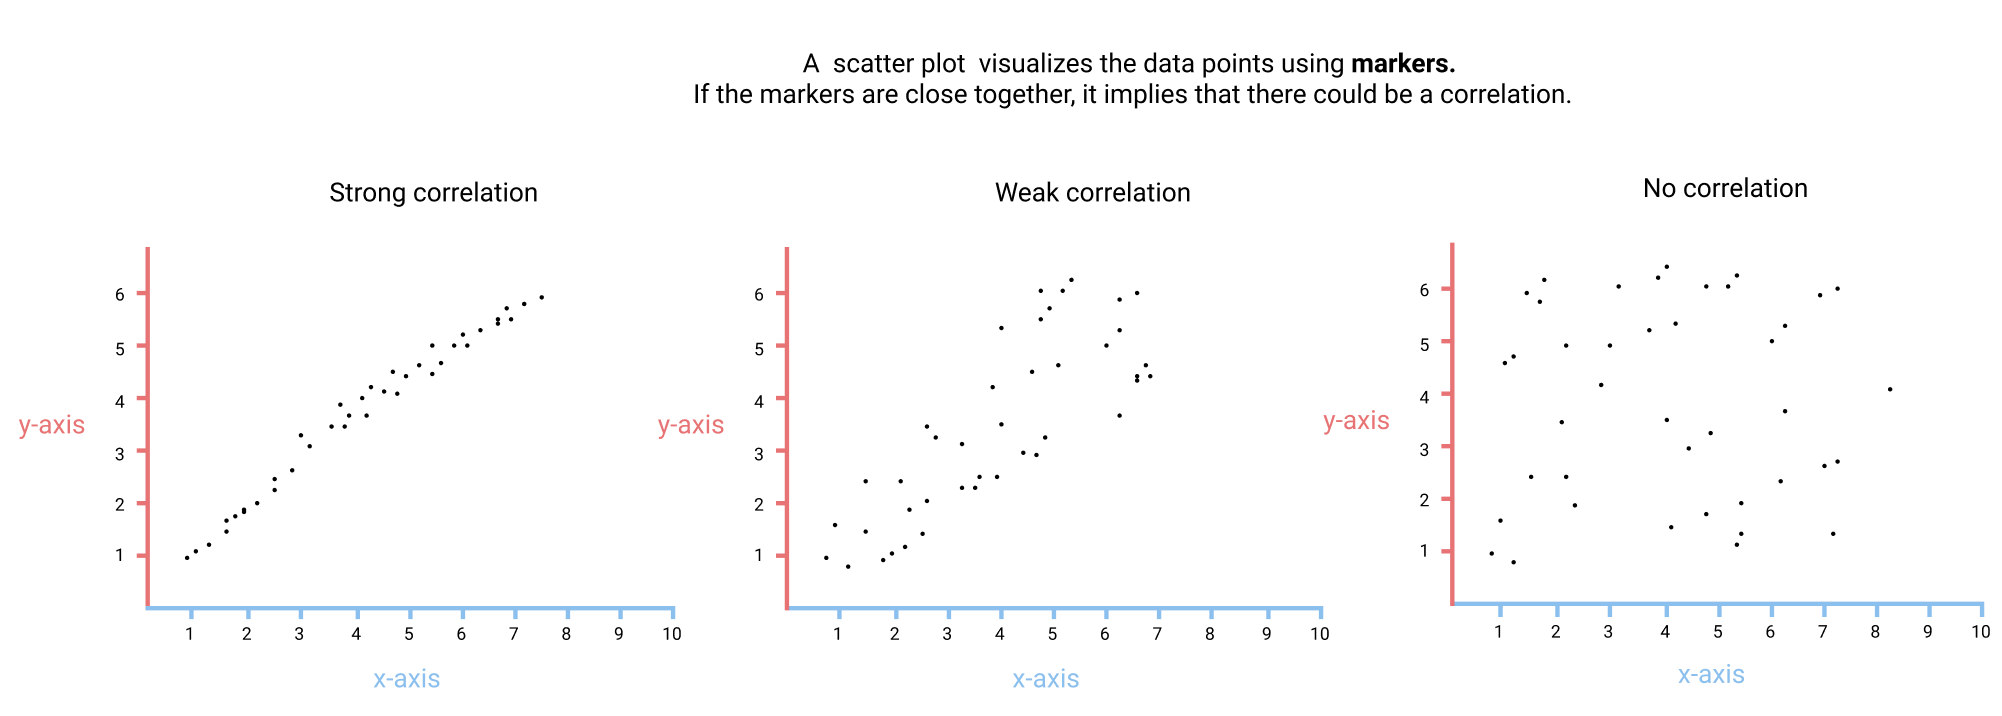

Let's start by creating a scatter plot that visualizes the relationship between the Fandango_Ratingvalue and RT_user_norm columns. We're looking for at least a weak correlation between the columns.

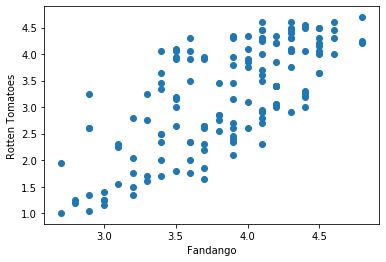

In [35]:
plt.scatter(norm_reviews['Fandango_Ratingvalue'], norm_reviews['RT_user_norm'])
plt.xlabel('Fandango')
plt.ylabel('Rotten Tomatoes')
plt.show()

The scatter plot suggests that there's a weak, positive correlation between the user ratings on Fandango and the user ratings on Rotten Tomatoes. The correlation is weak because for many x values, there are multiple corresponding y values. The correlation is positive because, in general, as x increases, y also increases.

Let's now try comparing Fandango with multiple other websites.

Something you may have observed above is that the x-axis and y-axis do operate in the same range of values. When generating multiple scatter plots for the purpose of comparison, it's important that all plots share the same ranges in the x-axis and y-axis. In the 2 plots we generated in the last step, the ranges for both axes didn't match. We can use Axes.set_xlim() and Axes.set_ylim() to set the data limits for both axes.

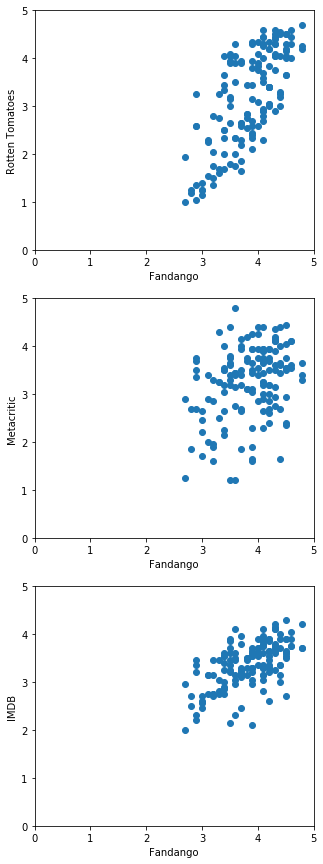

In [37]:
fig = plt.figure(figsize=(5,15))
ax1 = fig.add_subplot(3,1,1)
ax2 = fig.add_subplot(3,1,2)
ax3 = fig.add_subplot(3,1,3)

ax1.scatter(norm_reviews['Fandango_Ratingvalue'], norm_reviews['RT_user_norm'])
ax1.set_xlabel('Fandango')
ax1.set_ylabel('Rotten Tomatoes')
ax1.set_xlim(0, 5)
ax1.set_ylim(0, 5)

ax2.scatter(norm_reviews['Fandango_Ratingvalue'], norm_reviews['Metacritic_user_nom'])
ax2.set_xlabel('Fandango')
ax2.set_ylabel('Metacritic')
ax2.set_xlim(0, 5)
ax2.set_ylim(0, 5)

ax3.scatter(norm_reviews['Fandango_Ratingvalue'], norm_reviews['IMDB_norm'])
ax3.set_xlabel('Fandango')
ax3.set_ylabel('IMDB')
ax3.set_xlim(0, 5)
ax3.set_ylim(0, 5)

plt.show()

From the scatter plots, we can conclude that user ratings from Metacritic and Rotten Tomatoes span a larger range of values than those from IMDB or Fandango. User ratings from Metacritic and Rotten Tomatoes range from 1 to 5. User ratings from Fandango range approximately from 2.5 to 5 while those from IMDB range approximately from 2 to 4.5.

The scatter plots unfortunately only give us a limited understanding of the distributions of user ratings from each review site. For example, if a hundred movies had the same average user rating from IMDB and Fandango in the dataset, we would only see a single marker in the scatter plot. 

We'll learn how to visualize the distributions of user ratings using histograms. We can generate a histogram using 'plt.hist()'. This function has only 1 required parameter. We can also use the 'range' parameter if we want to specify the range of the values we want to see.

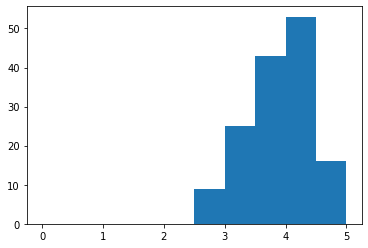

In [43]:
plt.hist(norm_reviews['Fandango_Ratingvalue'], range=(0,5))
plt.show()

Using that we can compare the distribution of the ratings from the Fandango site with the other movie rating sites. 

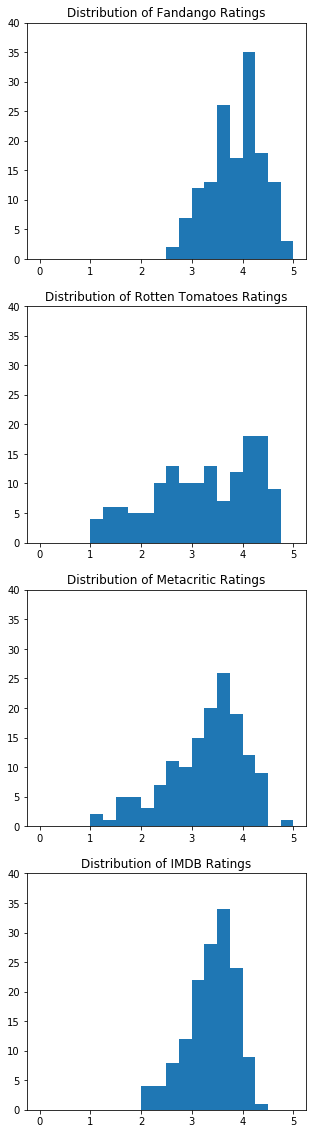

In [44]:
fig = plt.figure(figsize=(5,20))
ax1 = fig.add_subplot(4,1,1)
ax2 = fig.add_subplot(4,1,2)
ax3 = fig.add_subplot(4,1,3)
ax4 = fig.add_subplot(4,1,4)
ax1.hist(norm_reviews['Fandango_Ratingvalue'], bins=20, range=(0, 5))
ax1.set_title('Distribution of Fandango Ratings')
ax1.set_ylim(0, 40)

ax2.hist(norm_reviews['RT_user_norm'], bins=20, range=(0, 5))
ax2.set_title('Distribution of Rotten Tomatoes Ratings')
ax2.set_ylim(0, 40)

ax3.hist(norm_reviews['Metacritic_user_nom'], bins=20, range=(0, 5))
ax3.set_title('Distribution of Metacritic Ratings')
ax3.set_ylim(0, 40)

ax4.hist(norm_reviews['IMDB_norm'], bins=20, range=(0, 5))
ax4.set_title('Distribution of IMDB Ratings')
ax4.set_ylim(0, 40)

plt.show()

Something you may notice here is that when we use subplots the methods for adding titles or tempering the limits are a bit different. The only change is that instead of using any method we used before in a single plot, plt.method(), for axes we use ax.add_method().

We can also create 2 histograms in the same box to compare distributions.

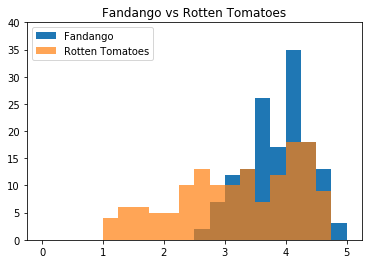

In [45]:
plt.hist(norm_reviews['Fandango_Ratingvalue'], bins=20, range=(0, 5), label = 'Fandango')
plt.hist(norm_reviews['RT_user_norm'], bins=20, range=(0, 5), alpha = 0.7, label = 'Rotten Tomatoes')
plt.title('Fandango vs Rotten Tomatoes')
plt.legend(loc = 'upper left')
plt.ylim(0,40)
plt.show()

You can see that each type of plot has a lot of parameters to consider in order to make your plot prettier. You do not need to learn everything by heart. The way to do it is by searching each function in google and finding its syntax. 

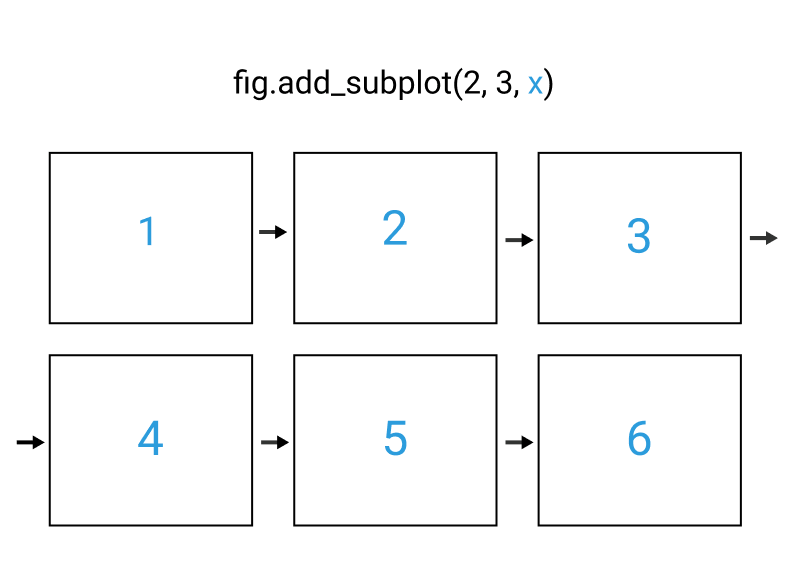

## Exercise 3

For the last exercise we want you to combine the histograms and the scatter plots that we saw above to create a figure that contains 6 plots with 3 columns and 2 rows. In the 1st row the 2 plots in the edges should be empty and the 1 in the middle be a histogram of the Fandango ratings. In the second row create 3 scatter plots comparing the Fandango ratings with the ratings from Rotten Tomatoes, Metacritic and IMDB. 